In [1]:
!nvidia-smi

Wed Sep  6 12:58:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content

/content


In [4]:
!rm -rf Dataset
!rm -rf Images
!rm -rf Annotations

!mkdir Dataset
!mkdir Dataset/train
!mkdir Dataset/val
!mkdir Dataset/test
!mkdir Dataset/train/images
!mkdir Dataset/train/labels
!mkdir Dataset/val/images
!mkdir Dataset/val/labels
!mkdir Dataset/test/images
!mkdir Dataset/test/labels

!mkdir Images
!mkdir Annotations

!cp -r /content/drive/MyDrive/fire\ custom\ dataset/train/images Images/
!cp -r /content/drive/MyDrive/fire\ custom\ dataset/val/images Images/
!cp -r /content/drive/MyDrive/fire\ custom\ dataset/train/labels Annotations/
!cp -r /content/drive/MyDrive/fire\ custom\ dataset/val/labels Annotations/

In [5]:
import pandas as pd
import cv2
import os
from glob import glob
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [6]:
len(glob('Images/images/*')), len(glob('Annotations/labels/*.txt'))

(1007, 1007)

In [7]:
!ls Images/images/*.gif

'Images/images/fire accidents in buildings_12.gif'
'Images/images/fire accidents in buildings_24.gif'


In [8]:
!rm -f Images/images/fire\ accidents\ in\ buildings_12.gif
!rm -f Images/images/fire\ accidents\ in\ buildings_24.gif
!rm -f Annotations/labels/fire\ accidents\ in\ buildings_12.txt
!rm -f Annotations/labels/fire\ accidents\ in\ buildings_24.txt

In [9]:
len(glob('Images/images/*')), len(glob('Annotations/labels/*.txt'))

(1005, 1005)

In [10]:
len(glob('Images/images/*.*.*')), len(glob('Annotations/labels/*.*.*'))

(405, 405)

In [11]:
for i,j in zip(sorted(glob('Images/images/*.*.*')), sorted(glob('Annotations/labels/*.*.*'))):
  os.rename(i, i.split('.')[0]+'_'+i.split('.')[1]+'.'+i.split('.')[2])
  os.rename(j, j.split('.')[0]+'_'+j.split('.')[1]+'.'+j.split('.')[2])


In [12]:
len(glob('Images/images/*.*.*')), len(glob('Annotations/labels/*.*.*'))

(0, 0)

In [13]:
len(glob('Images/images/*')), len(glob('Annotations/labels/*'))

(1005, 1005)

In [14]:
!pip install albumentations

In [15]:
imgs = sorted(glob('Images/images/*'))
anns = sorted(glob('Annotations/labels/*'))

In [16]:
len(imgs), len(anns)

(1005, 1005)

0it [00:00, ?it/s]

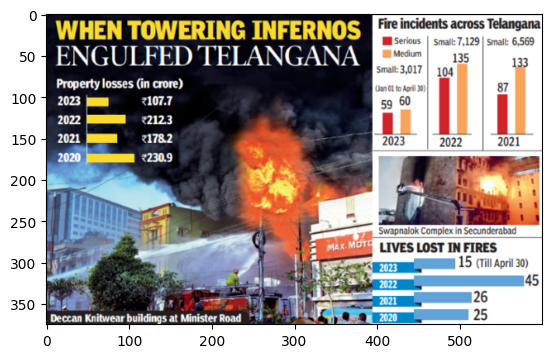

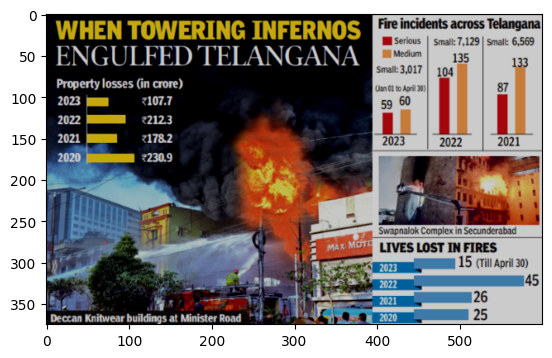

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/transforms.py:1258: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


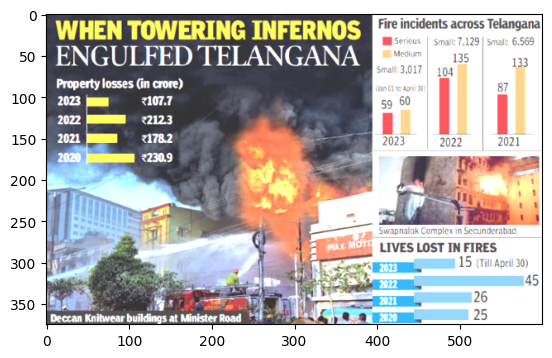

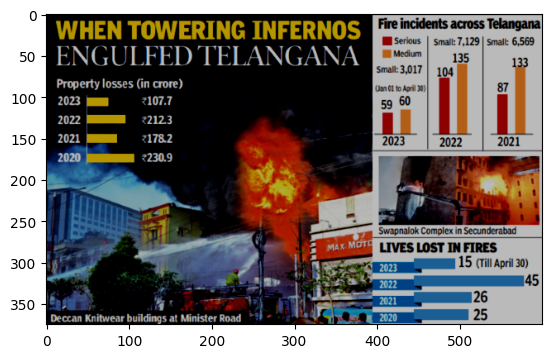

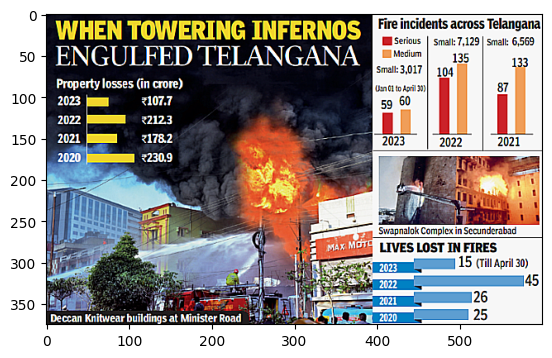

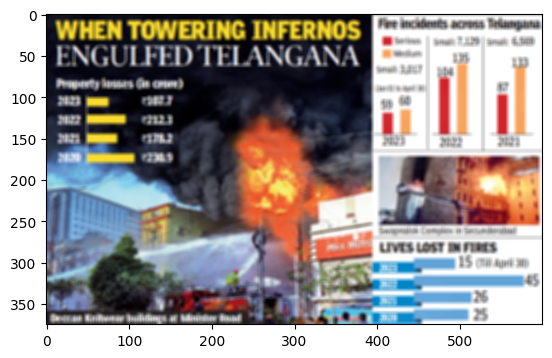

In [17]:
import albumentations as A

for i,j in tqdm(zip(imgs[5:6], anns[5:6])):

  img = cv2.imread(i)[:,:,::-1]
  plt.imshow(img)
  plt.show()

  # transform = A.RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3),
  #                                        brightness_by_max=True, p=1.0, always_apply=True)
  # HFlip = transform(image=img)
  # plt.imshow(HFlip['image'])
  # plt.show()

  transform = A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.01, hue=0.01, always_apply=True, p=1.0)
  CJ = transform(image=img)
  plt.imshow(CJ['image'])
  plt.show()

  # transform = A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=1.0)
  # HSV = transform(image=img)
  # plt.imshow(HSV['image'])
  # plt.show()

  transform = A.RandomBrightness(limit=(0.2, 0.35), always_apply=True, p=1.0)
  RB = transform(image=img)
  plt.imshow(RB['image'])
  plt.show()

  transform = A.RandomBrightness(limit=(-0.35, -0.2), always_apply=True, p=1.0)
  RB2 = transform(image=img)
  plt.imshow(RB2['image'])
  plt.show()

  transform = A.Sharpen(alpha=(0.25, 0.5), lightness=(0.5, 1.0), always_apply=True, p=1.0)
  Sharpen = transform(image=img)
  plt.imshow(Sharpen['image'])
  plt.show()

  transform = A.RandomFog(fog_coef_lower=0.25, fog_coef_upper=0.35, alpha_coef=0.08, always_apply=True, p=1.0)
  RF = transform(image=img)
  plt.imshow(RF['image'])
  plt.show()

In [18]:
i,j

('Images/images/fire accidents in buildings_16.png',
 'Annotations/labels/fire accidents in buildings_16.txt')

In [19]:
i.split('.')[0]+'_RBC.'+i.split('.')[1], j.split('.')[0]+'_RBC.'+j.split('.')[1]

('Images/images/fire accidents in buildings_16_RBC.png',
 'Annotations/labels/fire accidents in buildings_16_RBC.txt')

In [20]:
imgs = sorted(glob('Images/images/*'))
anns = sorted(glob('Annotations/labels/*'))

In [21]:
len(imgs), len(anns)

(1005, 1005)

In [22]:
import albumentations as A
import shutil

for i,j in tqdm(zip(imgs, anns), total=len(imgs)):

  img = cv2.imread(i)[:,:,::-1]
  # plt.imshow(img)
  # plt.show()

  # transform = A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.3), contrast_limit=(-0.2, 0.3),
  #                                        brightness_by_max=True, p=1.0, always_apply=True)
  # RBC = transform(image=img)
  # # plt.imshow(RBC['image'])
  # # plt.show()
  # cv2.imwrite(i.split('.')[0]+'_RBC.'+i.split('.')[1], RBC['image'][:,:,::-1])
  # shutil.copy(j, j.split('.')[0]+'_RBC.'+j.split('.')[1])

  transform = A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.05, hue=0.05, always_apply=True, p=1.0)
  CJ = transform(image=img)
  # plt.imshow(CJ['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_CJ.'+i.split('.')[1], CJ['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_CJ.'+j.split('.')[1])

  # transform = A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, always_apply=True, p=1.0)
  # HSV = transform(image=img)
  # # plt.imshow(HSV['image'])
  # # plt.show()
  # cv2.imwrite(i.split('.')[0]+'_HSV.'+i.split('.')[1], HSV['image'][:,:,::-1])
  # shutil.copy(j, j.split('.')[0]+'_HSV.'+j.split('.')[1])

  transform = A.RandomBrightness(limit=(0.2, 0.35), always_apply=True, p=1.0)
  RB = transform(image=img)
  # plt.imshow(RB['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_RB.'+i.split('.')[1], RB['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_RB.'+j.split('.')[1])

  transform = A.RandomBrightness(limit=(-0.35, -0.2), always_apply=True, p=1.0)
  RB2 = transform(image=img)
  # plt.imshow(RB2['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_RB2.'+i.split('.')[1], RB2['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_RB2.'+j.split('.')[1])

  transform = A.Sharpen(alpha=(0.25, 0.5), lightness=(0.5, 1.0), always_apply=True, p=1.0)
  Sharpen = transform(image=img)
  # plt.imshow(Sharpen['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_Sharpen.'+i.split('.')[1], Sharpen['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_Sharpen.'+j.split('.')[1])

  transform = A.RandomFog(fog_coef_lower=0.25, fog_coef_upper=0.35, alpha_coef=0.08, always_apply=True, p=1.0)
  RF = transform(image=img)
  # plt.imshow(RF['image'])
  # plt.show()
  cv2.imwrite(i.split('.')[0]+'_RF.'+i.split('.')[1], RF['image'][:,:,::-1])
  shutil.copy(j, j.split('.')[0]+'_RF.'+j.split('.')[1])

  0%|          | 0/1005 [00:00<?, ?it/s]

In [23]:
i,j

('Images/images/small (99).jpg', 'Annotations/labels/small (99).txt')

In [24]:
imgs = sorted(glob('Images/images/*'))
anns = sorted(glob('Annotations/labels/*'))
len(imgs), len(anns)

(6030, 6030)

In [25]:
import sklearn

for i in tqdm(range(10000)):
  imgs, anns = sklearn.utils.shuffle(imgs, anns, random_state=i)

for i in tqdm(range(10000)):
  imgs, anns = sklearn.utils.shuffle(imgs, anns, random_state=i)

for i in tqdm(range(10000)):
  imgs, anns = sklearn.utils.shuffle(imgs, anns, random_state=i)

for i in tqdm(range(10000)):
  imgs, anns = sklearn.utils.shuffle(imgs, anns, random_state=i)

for i in tqdm(range(10000)):
  imgs, anns = sklearn.utils.shuffle(imgs, anns, random_state=i)

len(imgs), len(anns)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

(6030, 6030)

In [26]:
imgs[24:29], anns[24:29]

(['Images/images/fire in buildings_55_CJ.jpeg',
  'Images/images/img (60)_CJ.jpg',
  'Images/images/small (12).jpg',
  'Images/images/small (38)_CJ.jpg',
  'Images/images/img (99)_RB.jpg'],
 ['Annotations/labels/fire in buildings_55_CJ.txt',
  'Annotations/labels/img (60)_CJ.txt',
  'Annotations/labels/small (12).txt',
  'Annotations/labels/small (38)_CJ.txt',
  'Annotations/labels/img (99)_RB.txt'])

In [27]:
len(imgs)*.7, len(imgs)*.2, len(imgs)*.1

(4221.0, 1206.0, 603.0)

In [28]:
'''
Train :  int(len(imgs)*.7)+int(len(imgs)*.1)
Val   :  1407
Test  :  703
'''
import shutil

for i in tqdm(range(len(imgs))):

  if i < int(len(imgs)*.7):
    shutil.copy(imgs[i], '/content/Dataset/train/images/')
    shutil.copy(anns[i], '/content/Dataset/train/labels/')

  elif int(len(imgs)*.7) <= i <int(len(imgs)*.7)+int(len(imgs)*.1):
    shutil.copy(imgs[i], '/content/Dataset/val/images/')
    shutil.copy(anns[i], '/content/Dataset/val/labels/')

  elif i >= int(len(imgs)*.7)+int(len(imgs)*.1):
    shutil.copy(imgs[i], '/content/Dataset/test/images/')
    shutil.copy(anns[i], '/content/Dataset/test/labels/')


  0%|          | 0/6030 [00:00<?, ?it/s]

In [29]:
len(glob('/content/Dataset/train/images/*')), len(glob('/content/Dataset/train/labels/*')), sorted(glob('/content/Dataset/train/images/*'))[6:10], sorted(glob('/content/Dataset/train/labels/*'))[6:10]

(4221,
 4221,
 ['/content/Dataset/train/images/fire accidents in buildings_11_CJ.jpeg',
  '/content/Dataset/train/images/fire accidents in buildings_11_RB.jpeg',
  '/content/Dataset/train/images/fire accidents in buildings_11_RB2.jpeg',
  '/content/Dataset/train/images/fire accidents in buildings_11_RF.jpeg'],
 ['/content/Dataset/train/labels/fire accidents in buildings_11_CJ.txt',
  '/content/Dataset/train/labels/fire accidents in buildings_11_RB.txt',
  '/content/Dataset/train/labels/fire accidents in buildings_11_RB2.txt',
  '/content/Dataset/train/labels/fire accidents in buildings_11_RF.txt'])

In [30]:
len(glob('/content/Dataset/val/images/*')), len(glob('/content/Dataset/val/labels/*')), sorted(glob('/content/Dataset/val/images/*'))[6:10], sorted(glob('/content/Dataset/val/labels/*'))[6:10]

(603,
 603,
 ['/content/Dataset/val/images/fire accidents in buildings_20_RF.jpeg',
  '/content/Dataset/val/images/fire accidents in buildings_21.png',
  '/content/Dataset/val/images/fire accidents in buildings_34_CJ.jpeg',
  '/content/Dataset/val/images/fire accidents in buildings_34_RB.jpeg'],
 ['/content/Dataset/val/labels/fire accidents in buildings_20_RF.txt',
  '/content/Dataset/val/labels/fire accidents in buildings_21.txt',
  '/content/Dataset/val/labels/fire accidents in buildings_34_CJ.txt',
  '/content/Dataset/val/labels/fire accidents in buildings_34_RB.txt'])

In [31]:
len(glob('/content/Dataset/test/images/*')), len(glob('/content/Dataset/test/labels/*')), sorted(glob('/content/Dataset/test/images/*'))[6:10], sorted(glob('/content/Dataset/test/labels/*'))[6:10]

(1206,
 1206,
 ['/content/Dataset/test/images/fire accidents in buildings_16_RB.png',
  '/content/Dataset/test/images/fire accidents in buildings_18_RB2.jpeg',
  '/content/Dataset/test/images/fire accidents in buildings_18_Sharpen.jpeg',
  '/content/Dataset/test/images/fire accidents in buildings_19_RF.jpeg'],
 ['/content/Dataset/test/labels/fire accidents in buildings_16_RB.txt',
  '/content/Dataset/test/labels/fire accidents in buildings_18_RB2.txt',
  '/content/Dataset/test/labels/fire accidents in buildings_18_Sharpen.txt',
  '/content/Dataset/test/labels/fire accidents in buildings_19_RF.txt'])

In [32]:
!rm -rf /content/Images
!rm -rf /content/Annotations

In [33]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.2/614.2 kB 9.7 MB/s eta 0:00:00


In [34]:
!rm -r runs
!yolo task=detect mode=train model=/content/yolov8n.yml imgsz=384 data=/content/data.yml epochs=1000 batch=64 name=yolov8n_custom patience=10 mosaic=0.0 fliplr=0.75 flipud=0.25 scale=0.0 hsv_h=0.0 hsv_v=0.0 hsv_s=0.0 translate=0.0 mixup=0.0 scale=0.15 shear=0.15 degrees=0.15

rm: cannot remove 'runs': No such file or directory

                   from  n    params  module                                       arguments                     
  0                  -1  1       232  ultralytics.nn.modules.conv.Conv             [3, 8, 3, 2]                  
  1                  -1  1       592  ultralytics.nn.modules.conv.Conv             [8, 8, 3, 2]                  
  2                  -1  1       496  ultralytics.nn.modules.block.C2f             [8, 8, 1, True]               
  3                  -1  1      1184  ultralytics.nn.modules.conv.Conv             [8, 16, 3, 2]                 
  4                  -1  2      3200  ultralytics.nn.modules.block.C2f             [16, 16, 2, True]             
  5                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  6                  -1  2     12544  ultralytics.nn.modules.block.C2f             [32, 32, 2, True]             
  7                  -1  1     1624

In [35]:
!yolo task=detect mode=val model=/content/runs/detect/yolov8n_custom/weights/best.pt name=yolov8n_eval data=data.yml imgsz=384

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 328943 parameters, 0 gradients
val: Scanning /content/Dataset/test/labels... 1206 images, 0 backgrounds, 0 corrupt: 100% 1206/1206 [00:05<00:00, 216.29it/s]
val: WARNING ⚠️ /content/Dataset/test/images/fire_357.png: corrupt JPEG restored and saved
val: New cache created: /content/Dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 76/76 [00:24<00:00,  3.04it/s]
                   all       1206       2472      0.752      0.656      0.725      0.414
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/yolov8n_eval


In [36]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom/weights/best.pt source=/content/Dataset/test/images/fire\ accidents\ in\ buildings_13_RB.jpeg show=True imgsz=384 name=yolov8n_custom hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 328943 parameters, 0 gradients

image 1/1 /content/Dataset/test/images/fire accidents in buildings_13_RB.jpeg: 288x384 4 fires, 94.0ms
Speed: 1.9ms preprocess, 94.0ms inference, 2.5ms postprocess per image at shape (1, 3, 288, 384)
Results saved to runs/detect/yolov8n_custom2


In [37]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom/weights/best.pt source=/content/Dataset/test/images/fire\ accidents\ in\ buildings_15_CJ.jpeg show=True imgsz=384 name=yolov8n_custom hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 328943 parameters, 0 gradients

image 1/1 /content/Dataset/test/images/fire accidents in buildings_15_CJ.jpeg: 288x384 9 fires, 167.3ms
Speed: 8.7ms preprocess, 167.3ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 384)
Results saved to runs/detect/yolov8n_custom3


In [38]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom/weights/best.pt source=/content/Dataset/test/images/fire\ in\ buildings_11_RB2.jpeg show=True imgsz=384 name=yolov8n_custom hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 328943 parameters, 0 gradients

image 1/1 /content/Dataset/test/images/fire in buildings_11_RB2.jpeg: 288x384 1 fire, 96.1ms
Speed: 1.8ms preprocess, 96.1ms inference, 2.3ms postprocess per image at shape (1, 3, 288, 384)
Results saved to runs/detect/yolov8n_custom4


In [39]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom/weights/best.pt source=/content/Dataset/test/images/fire\ in\ buildings_58_Sharpen.jpeg show=True imgsz=384 name=yolov8n_custom hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 328943 parameters, 0 gradients

image 1/1 /content/Dataset/test/images/fire in buildings_58_Sharpen.jpeg: 256x384 2 fires, 200.8ms
Speed: 1.6ms preprocess, 200.8ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 384)
Results saved to runs/detect/yolov8n_custom5


In [40]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom/weights/best.pt source=/content/Dataset/test/images/fire\ in\ buildings_30_RB.jpeg show=True imgsz=384 name=yolov8n_custom hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 328943 parameters, 0 gradients

image 1/1 /content/Dataset/test/images/fire in buildings_30_RB.jpeg: 224x384 2 fires, 110.6ms
Speed: 1.5ms preprocess, 110.6ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 384)
Results saved to runs/detect/yolov8n_custom6


In [41]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/yolov8n_custom/weights/best.pt")  # load a pretrained model (recommended for training)
model.export(format="onnx")

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 328943 parameters, 0 gradients

PyTorch: starting from '/content/runs/detect/yolov8n_custom/weights/best.pt' with input shape (1, 3, 384, 384) BCHW and output shape(s) (1, 5, 3024) (0.8 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 69.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 7.8s, saved as '/content/runs/detect/yolov8n_custom/weights/best.onnx' (1.4 MB)

Export complete (9.3s)
Results saved to /content/runs/detect/yolov8n_custom/weights
Predict:         yolo predict task=detect model=/content/runs/detect/yolov8n_custom/weights/best.onnx imgsz=384  
Vali

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'/content/runs/detect/yolov8n_custom/weights/best.onnx'

In [42]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom/weights/best.onnx source=/content/Dataset/test/images/fire\ in\ buildings_30_RB.jpeg show=True imgsz=384 name=yolov8n_custom hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Loading /content/runs/detect/yolov8n_custom/weights/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 220.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 296.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.9s, installed 1 package: ['onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/1 /content/Dataset/test/images/fire in buildings_30_RB.jpeg: 384x384 2 fires, 23.4ms
Speed: 3.1ms preprocess, 23.4ms infere

In [43]:
!yolo task=detect mode=predict model=/content/runs/detect/yolov8n_custom/weights/best.onnx source=/content/Dataset/test/images/fire\ in\ buildings_30_RB.jpeg show=True imgsz=384 name=yolov8n_custom hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.0.171 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Loading /content/runs/detect/yolov8n_custom/weights/best.onnx for ONNX Runtime inference...

image 1/1 /content/Dataset/test/images/fire in buildings_30_RB.jpeg: 384x384 2 fires, 46.6ms
Speed: 2.8ms preprocess, 46.6ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 384)
Results saved to runs/detect/yolov8n_custom8


In [47]:
!zip -r /content/runs_2.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/yolov8n_custom/ (stored 0%)
  adding: content/runs/detect/yolov8n_custom/weights/ (stored 0%)
  adding: content/runs/detect/yolov8n_custom/weights/best.pt (deflated 20%)
  adding: content/runs/detect/yolov8n_custom/weights/last.pt (deflated 20%)
  adding: content/runs/detect/yolov8n_custom/weights/best.onnx (deflated 16%)
  adding: content/runs/detect/yolov8n_custom/results.png (deflated 9%)
  adding: content/runs/detect/yolov8n_custom/train_batch2.jpg (deflated 14%)
  adding: content/runs/detect/yolov8n_custom/labels.jpg (deflated 25%)
  adding: content/runs/detect/yolov8n_custom/results.csv (deflated 86%)
  adding: content/runs/detect/yolov8n_custom/args.yaml (deflated 52%)
  adding: content/runs/detect/yolov8n_custom/train_batch0.jpg (deflated 13%)
  adding: content/runs/detect/yolov8n_custom/events.out.tfevents.1694006069.8ab434a2467d.8297.0 (deflated 75%)
  adding: content/

In [45]:
!cp -r /content/runs_2.zip /content/drive/MyDrive/

cp: cannot create regular file '/content/runs/content/drive/MyDrive/': No such file or directory
